# Home Credit Default Risk dataset

The data was provided by Home Credit through a Kaggle competition with the objective of predicting whether or not a loan applicant will be able to repay the leaned amount. Thus, this is a supervised classification task.

## Initial imports and data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import os

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir("data")

['.DS_Store',
 'HomeCredit_columns_description.csv',
 '.application_test.csv.icloud',
 '.application_train.csv.icloud']

In [4]:
data = pd.read_csv("data/application_train.csv")
print("The data has {} rows and {} columns.".format(data.shape[0],data.shape[1]))
data.head()

The data has 307511 rows and 122 columns.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## EDA

### Target variable
As this is a supervised classification problem, it is important to initially inspect the target variable to learn how balanced or imbalanced the data is.

The target variable has 0 missing values.
Positive cases represent 8.07% of all the samples.


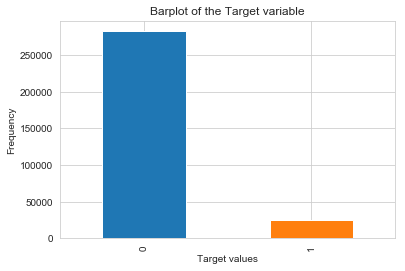

In [5]:
print("The target variable has {} missing values.".format(data["TARGET"].isnull().sum()))
print("Positive cases represent {:.3}% of all the samples.".format((data["TARGET"].sum()/data["TARGET"].shape[0])*100))
data["TARGET"].value_counts().plot(kind="bar", title="Barplot of the Target variable")

plt.xlabel("Target values"); plt.ylabel("Frequency");

In [6]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

As we can see, this is a very impabanced dataset. For a classification task to perform better, this issue will have to be addressed.

### Columns descriptions and Missing values

In [7]:
data['TARGET'].dtype

dtype('int64')

In [8]:
descriptions = pd.read_csv("data/HomeCredit_columns_description.csv", encoding="latin1",
                           usecols=["Row", "Description","Special"])

missings = {}
for col in data.columns:
    missings[col] = {"% missing from total":np.round((data[col].isnull().sum()/data.shape[0])*100,2),
                    "null values":int(data[col].isnull().sum()),
                    "dtype":str(data[col].dtype),
                    "unique values":len(data[col].unique())}
missing_df = pd.DataFrame(missings).T.sort_values(by="% missing from total", ascending=False)
info_df = pd.merge(missing_df, descriptions, how="inner", left_index=True, right_on="Row").set_index("Row")


info_df.head(7)

% missing from total    dtype null values  \
Row                                                                  
COMMONAREA_MEDI                         69.87  float64      214865   
COMMONAREA_AVG                          69.87  float64      214865   
COMMONAREA_MODE                         69.87  float64      214865   
NONLIVINGAPARTMENTS_MODE                69.43  float64      213514   
NONLIVINGAPARTMENTS_AVG                 69.43  float64      213514   
NONLIVINGAPARTMENTS_MEDI                69.43  float64      213514   
FONDKAPREMONT_MODE                      68.39   object      210295   

                         unique values  \
Row                                      
COMMONAREA_MEDI                   3203   
COMMONAREA_AVG                    3182   
COMMONAREA_MODE                   3129   
NONLIVINGAPARTMENTS_MODE           168   
NONLIVINGAPARTMENTS_AVG            387   
NONLIVINGAPARTMENTS_MEDI           215   
FONDKAPREMONT_MODE                   5   

                                                                Description  \
Row                                                                           
COMMONAREA_MEDI           Normalized information about building where th...   
COMMONAREA_AVG            Normalized information about building where th...   
COMMONAREA_MODE           Normalized information about building where th...   
NONLIVINGAPARTMENTS_MODE  Normalized information about building where th...   
NONLIVINGAPARTMENTS_AVG   Normalized information about building where th...   
NONLIVINGAPARTMENTS_MEDI  Normalized information about building where th...   
FONDKAPREMONT_MODE        Normalized information about building where th...   

                             Special  
Row                                   
COMMONAREA_MEDI           normalized  
COMMONAREA_AVG            normalized  
COMMONAREA_MODE           normalized  
NONLIVINGAPARTMENTS_MODE  normalized  
NONLIVINGAPARTMENTS_AVG   normalized  
NONLIVINGAPARTMENTS_MEDI  normalized  
FONDKAPREMONT_MODE        normalized

In [9]:
print(info_df.shape)
info_df.drop('SK_ID_CURR', inplace=True, axis=0)
print(info_df.shape)

(135, 6)
(129, 6)


In [17]:
df_describe = data.describe().T
all_descriptions_df = pd.merge(info_df, df_describe, how='left', left_index=True, right_index=True)
print(all_descriptions_df.shape)
all_descriptions_df.head(5)

(129, 14)


% missing from total    dtype null values unique values  \
AMT_ANNUITY                    0  float64          12         13673   
AMT_ANNUITY                    0  float64          12         13673   
AMT_ANNUITY                    0  float64          12         13673   
AMT_CREDIT                     0  float64           0          5603   
AMT_CREDIT                     0  float64           0          5603   

                                                   Description Special  \
AMT_ANNUITY                                       Loan annuity     NaN   
AMT_ANNUITY                Annuity of the Credit Bureau credit     NaN   
AMT_ANNUITY                    Annuity of previous application     NaN   
AMT_CREDIT                           Credit amount of the loan     NaN   
AMT_CREDIT   Final credit amount on the previous applicatio...     NaN   

                count           mean            std      min       25%  \
AMT_ANNUITY  307499.0   27108.573909   14493.737315   1615.5   16524.0   
AMT_ANNUITY  307499.0   27108.573909   14493.737315   1615.5   16524.0   
AMT_ANNUITY  307499.0   27108.573909   14493.737315   1615.5   16524.0   
AMT_CREDIT   307511.0  599025.999706  402490.776996  45000.0  270000.0   
AMT_CREDIT   307511.0  599025.999706  402490.776996  45000.0  270000.0   

                  50%       75%        max  
AMT_ANNUITY   24903.0   34596.0   258025.5  
AMT_ANNUITY   24903.0   34596.0   258025.5  
AMT_ANNUITY   24903.0   34596.0   258025.5  
AMT_CREDIT   513531.0  808650.0  4050000.0  
AMT_CREDIT   513531.0  808650.0  4050000.0

### Flags

In [18]:
flags = []
for col in data.columns:
    if col.startswith('FLAG'):
        flags.append(col)
flags

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [19]:
# Rearrange flags to be considered as categoricals
all_descriptions_df.loc[flags,'dtype'] = 'object'
all_descriptions_df.to_csv('data_description.csv')

In [10]:
print("There are {} columns with missing values.".format((info_df["null values"]>1).sum()))

There are 70 columns with missing values.


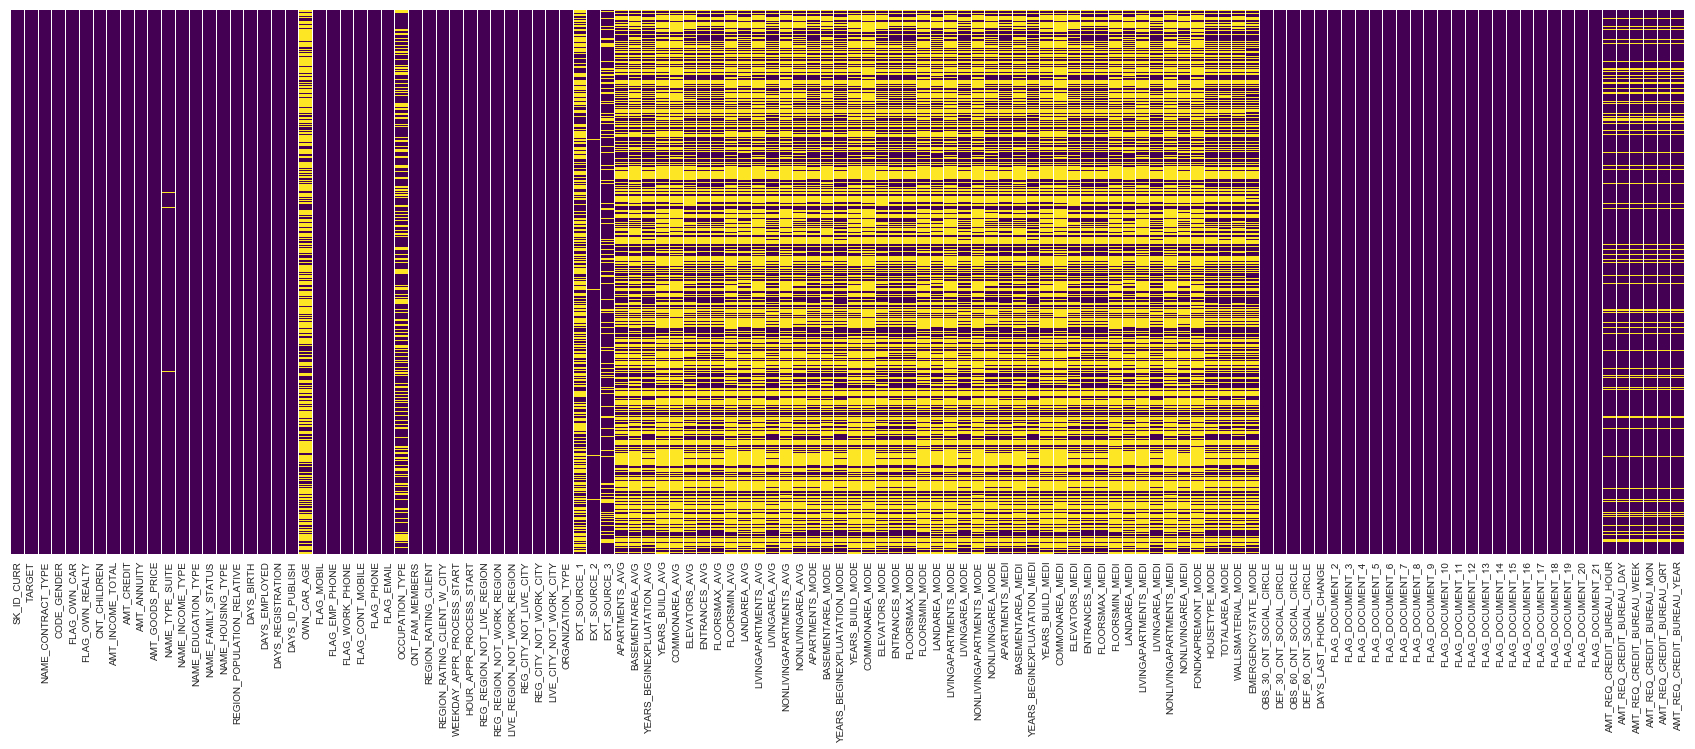

In [11]:
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False);

In [12]:
print("From the total {} columns, {} are categorical and {} are numerical. These are either floats or integers."
      .format(info_df["dtype"].value_counts().sum(),
              info_df["dtype"].value_counts().loc["object"],
              info_df["dtype"].value_counts().sum() - info_df["dtype"].value_counts().loc["object"]))

From the total 129 columns, 45 are categorical and 84 are numerical. These are either floats or integers.


In [13]:
continuous_cols = info_df[info_df["dtype"] != "object"].index.values.tolist()
categorical_cols = info_df[info_df["dtype"] == "object"].index.values.tolist()

for col in sorted(continuous_cols):
    if col.startswith("FLAG"):
        continuous_cols.remove(col)
        categorical_cols.append(col)
    if col.startswith("SK_ID"):
        continuous_cols.remove(col)

continuous_cols.remove("TARGET")

### Categorical columns

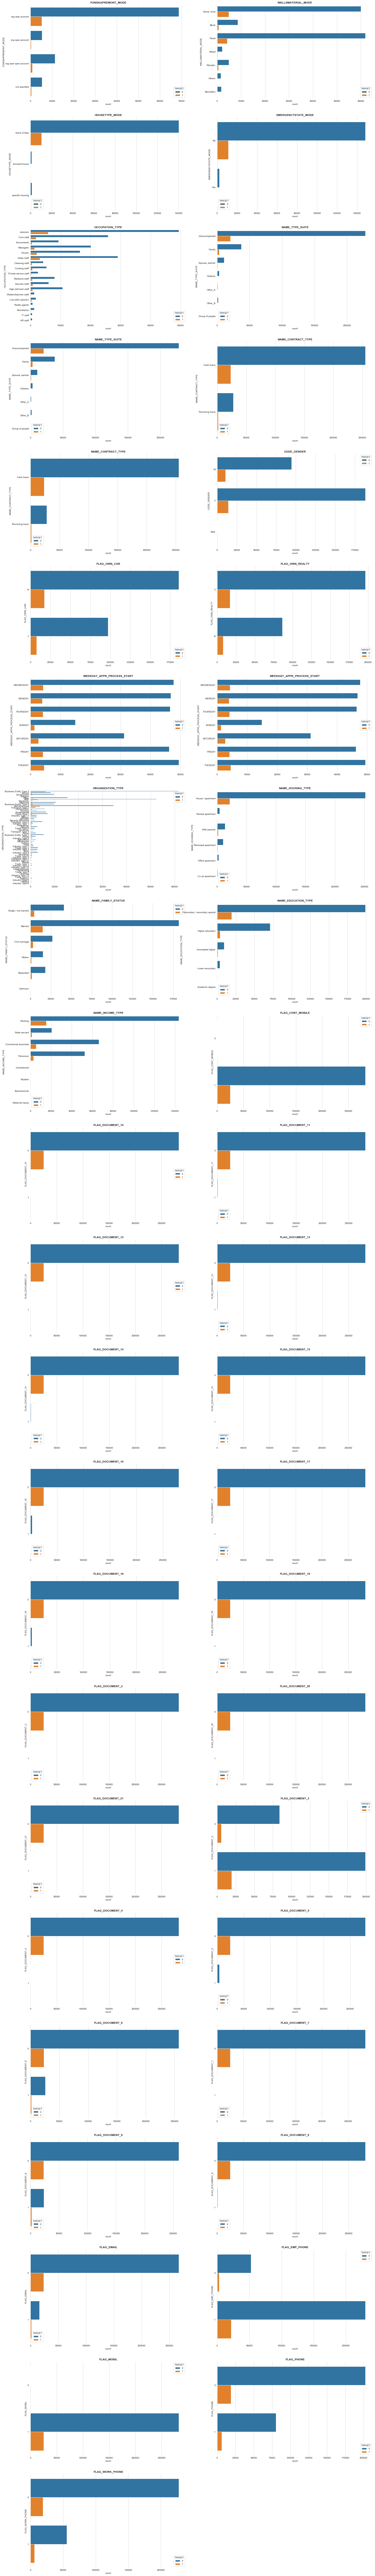

In [11]:
fig = plt.figure(figsize=(26,200), facecolor='white')
for r in range(len(categorical_cols)):
    ax = fig.add_subplot(23,2,r+1)
    ax = sns.countplot(y=data[categorical_cols[r]], hue=data["TARGET"])#, palette='Greens_d')
    ax.set_title(categorical_cols[r], fontweight='bold', fontsize=12)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()

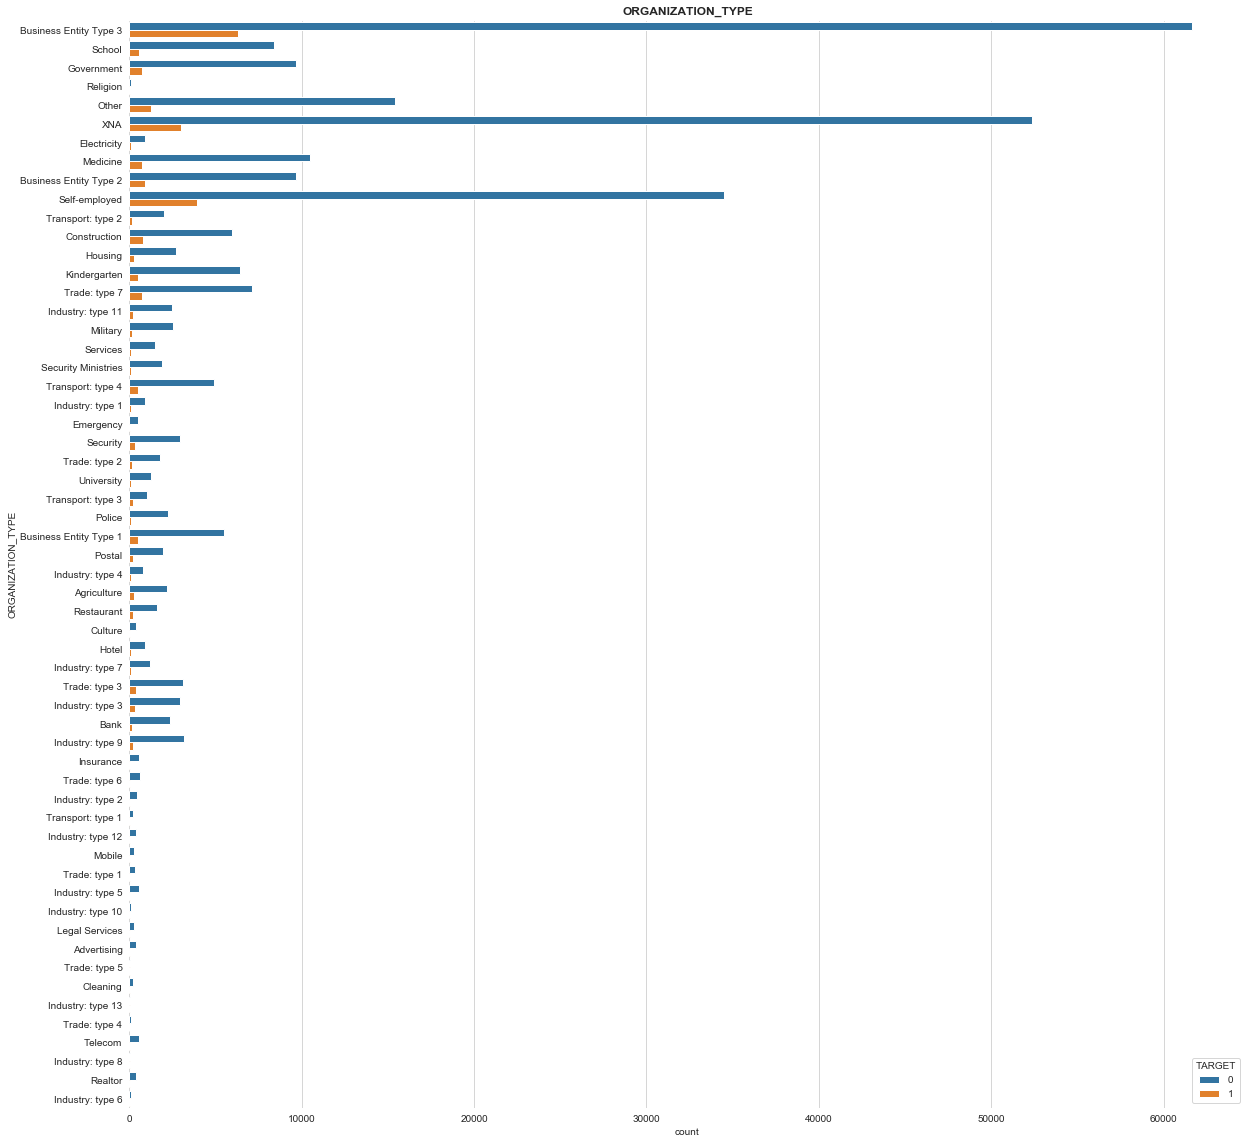

In [12]:
plt.figure(figsize=(20,20))
ax = sns.countplot(y=data["ORGANIZATION_TYPE"], hue=data["TARGET"])
ax.set_title("ORGANIZATION_TYPE", fontweight='bold', fontsize=12)
for key,spine in ax.spines.items():
    spine.set_visible(False)

### Continuous columns

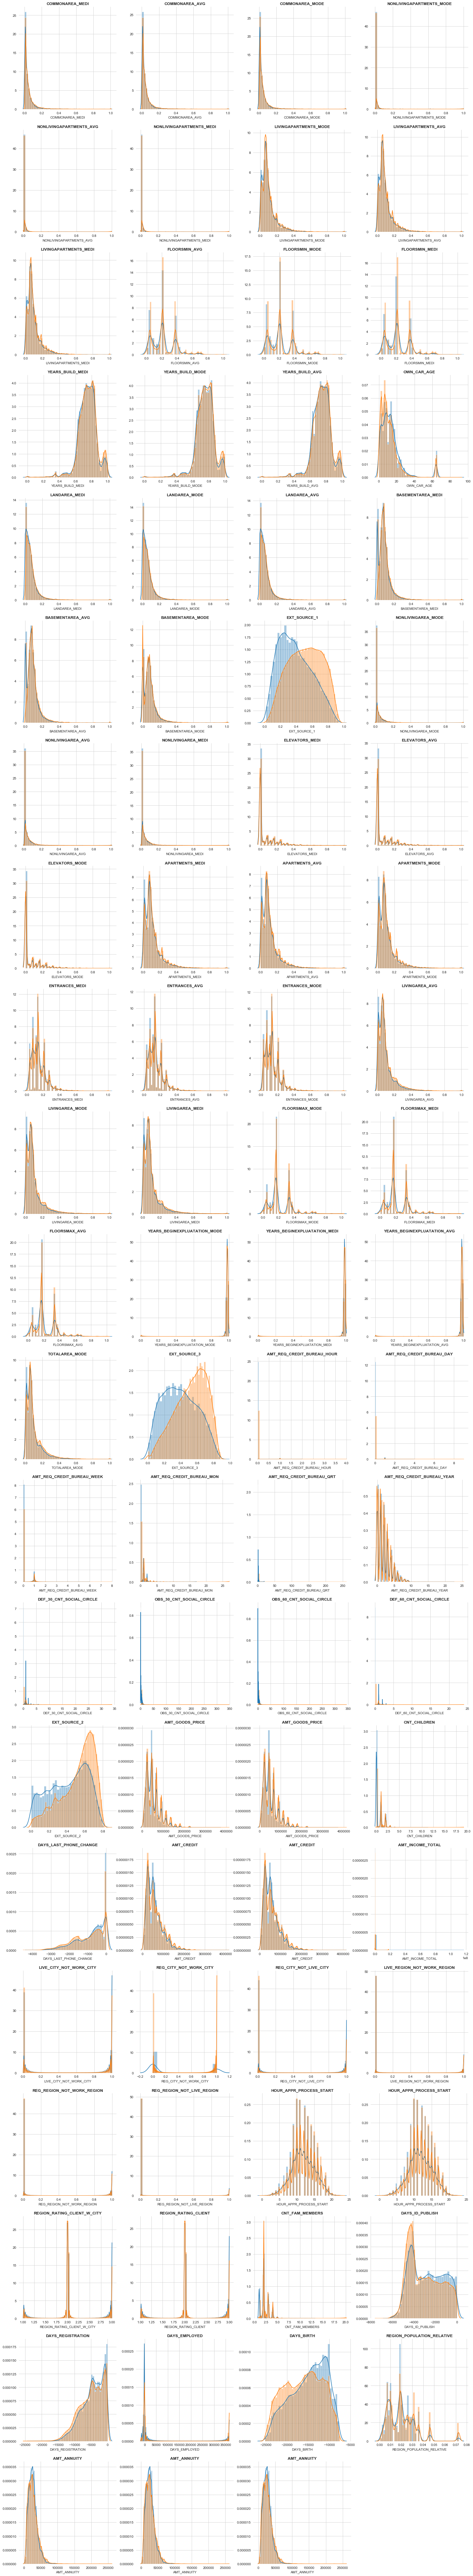

In [13]:
fig = plt.figure(figsize=(24, 140), facecolor='white')
for r in range(len(continuous_cols)):
    ax = fig.add_subplot(21,4,r+1)
    ax = sns.distplot(data[continuous_cols[r]][data["TARGET"] == 1].dropna())
    ax = sns.distplot(data[continuous_cols[r]][data["TARGET"] == 0].dropna())
    ax.set_title(continuous_cols[r], fontweight='bold')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()

As we can see, some other features described above are also categorical, as they have limited and fixed values. As examples, it is possible to point out region_rating_client and reg_region_not_work_region. Nonetheless, even though we are plotting distributions, we can still see how these variables can differentiate both classes.

### Empirical Cumulative Distribution Function (ECDF)

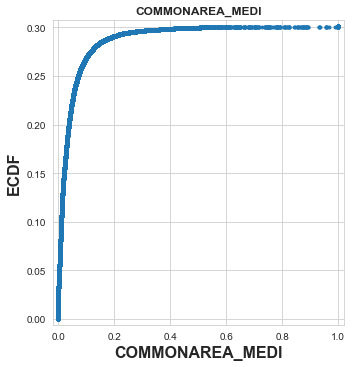

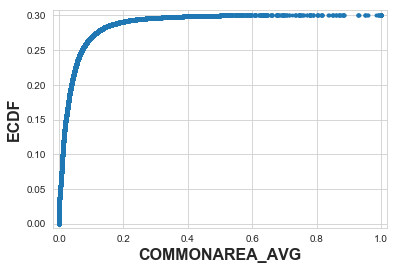

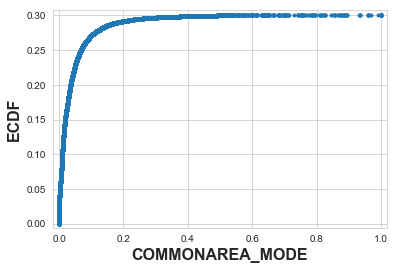

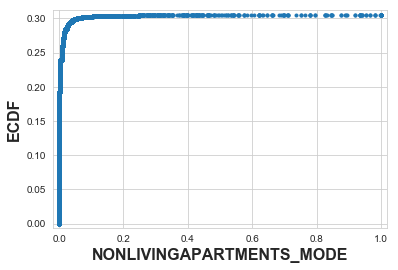

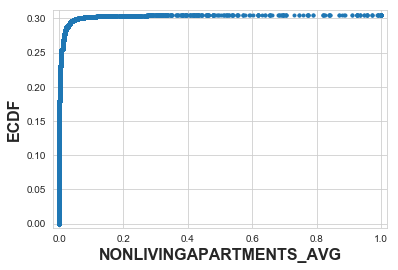

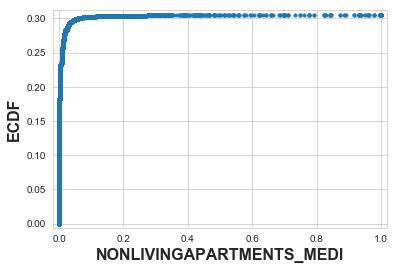

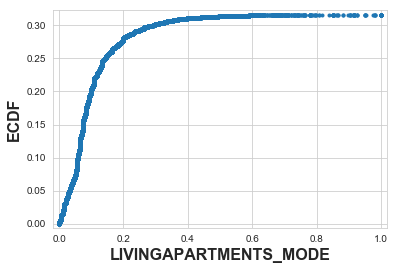

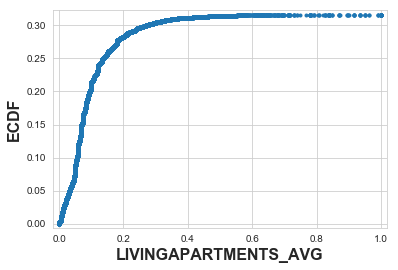

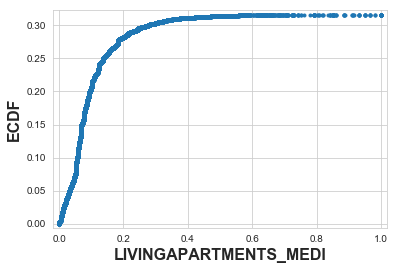

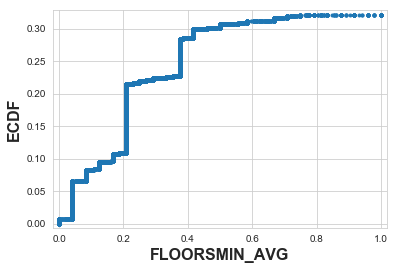

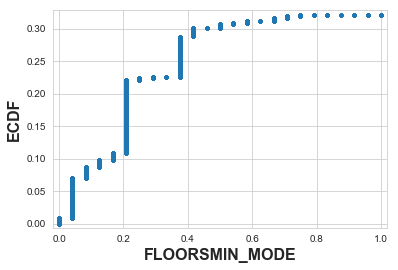

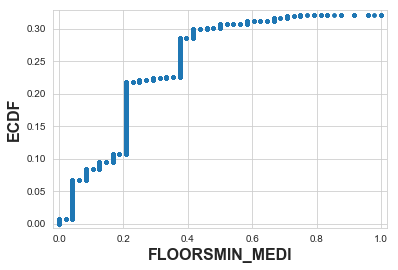

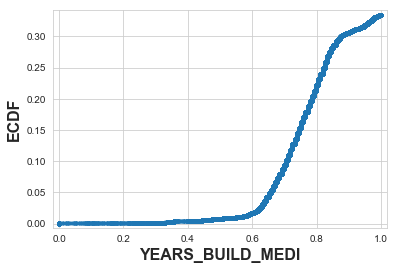

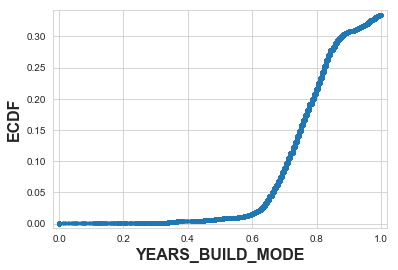

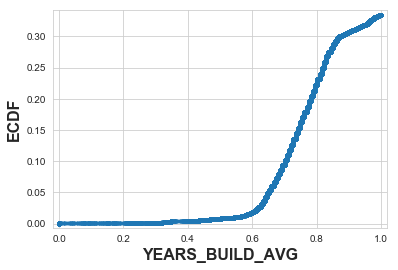

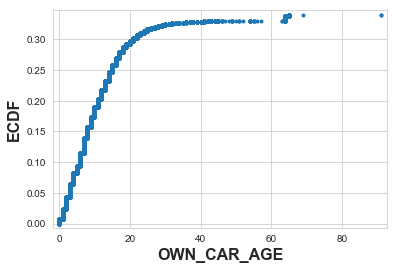

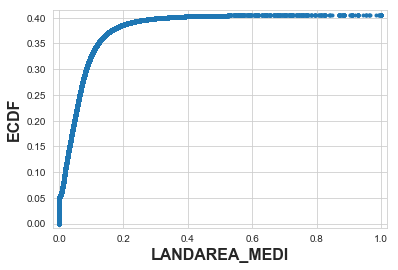

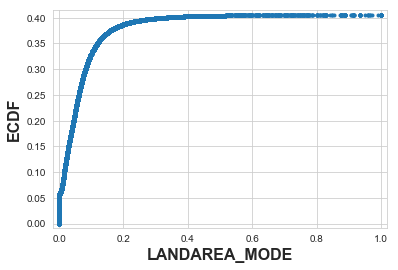

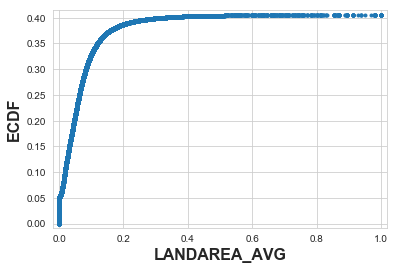

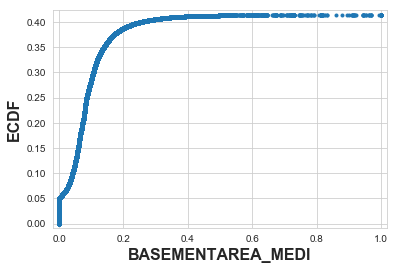

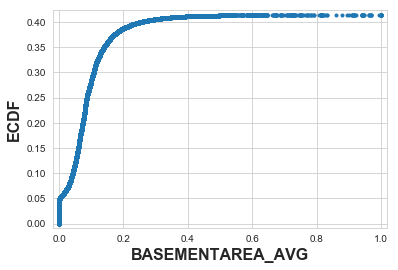

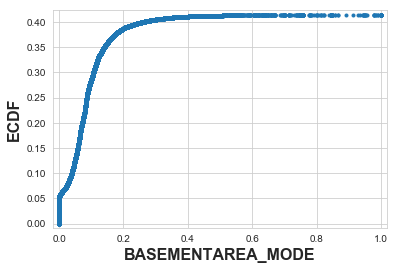

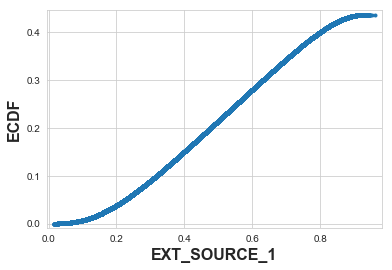

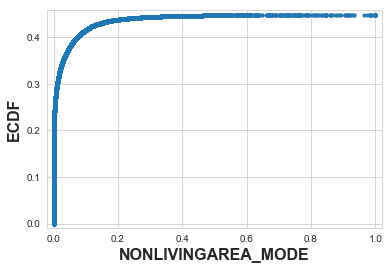

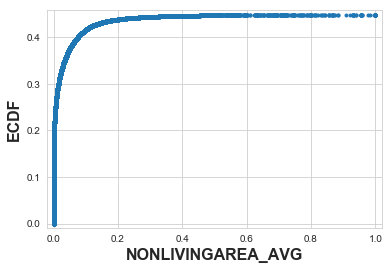

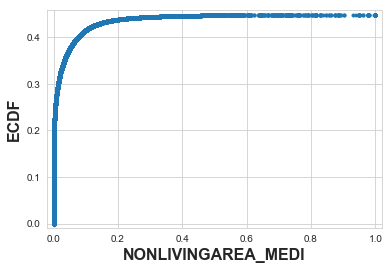

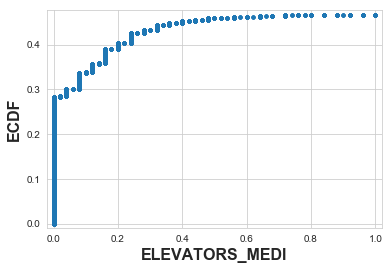

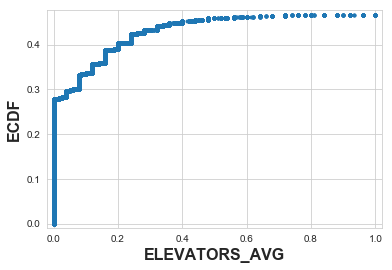

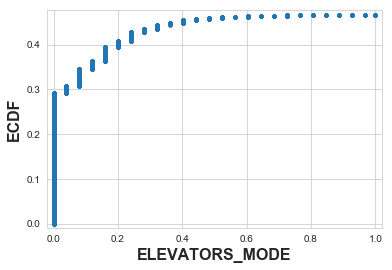

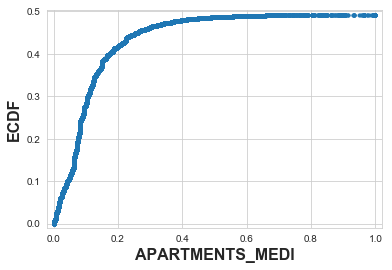

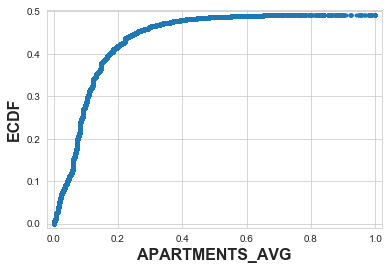

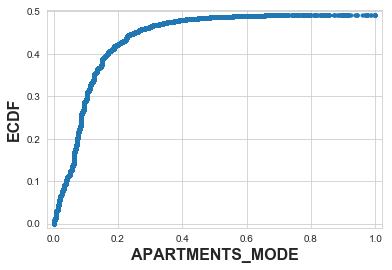

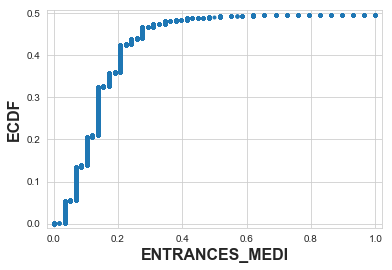

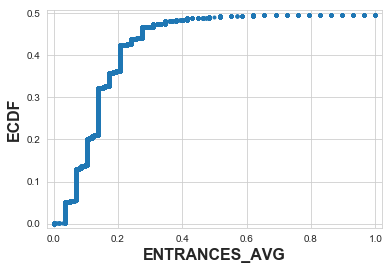

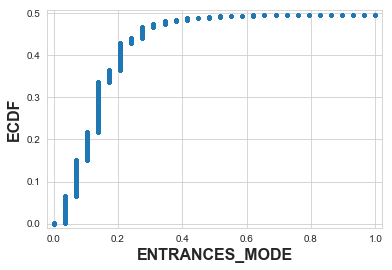

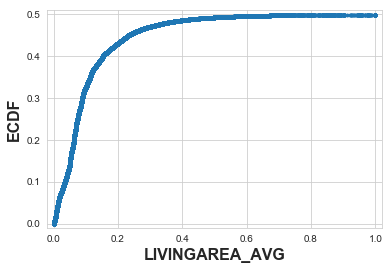

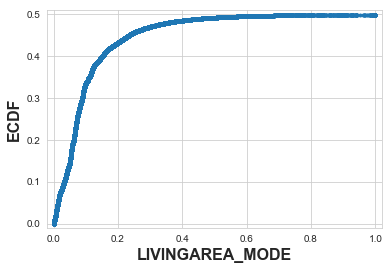

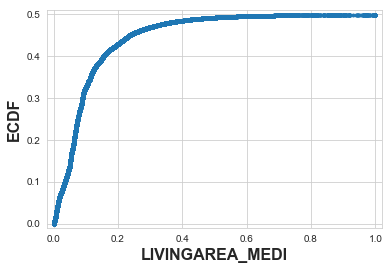

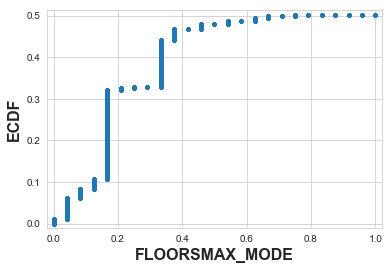

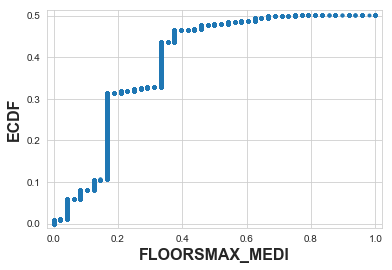

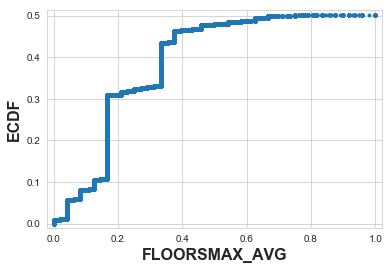

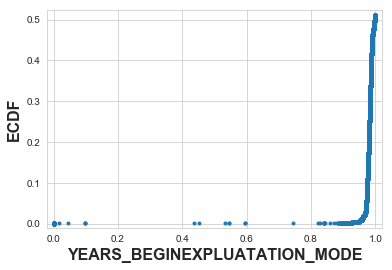

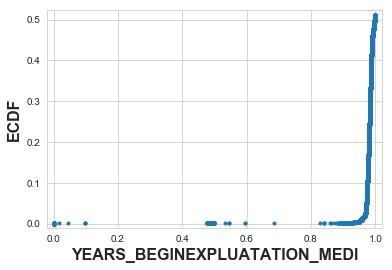

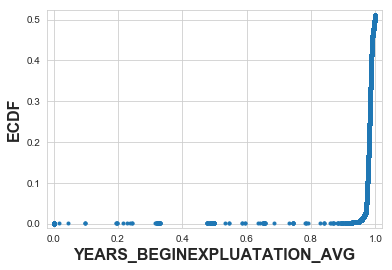

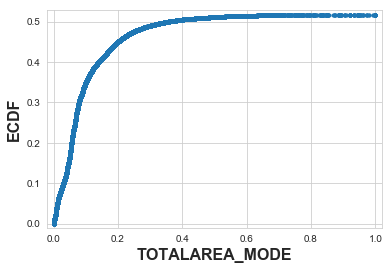

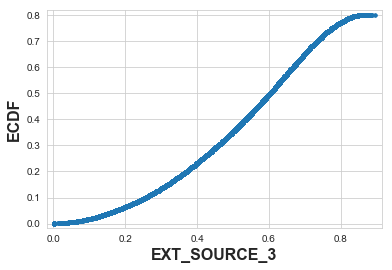

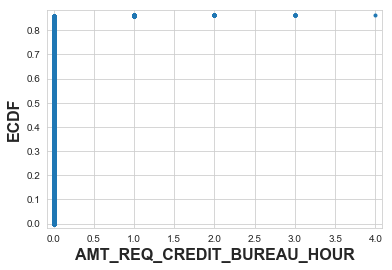

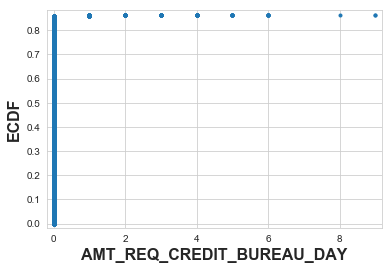

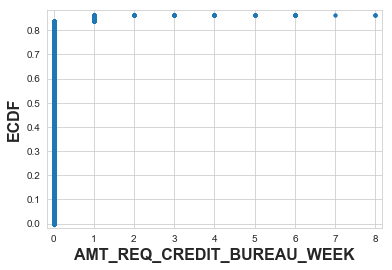

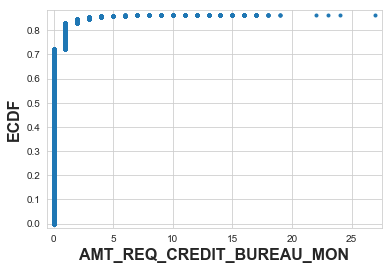

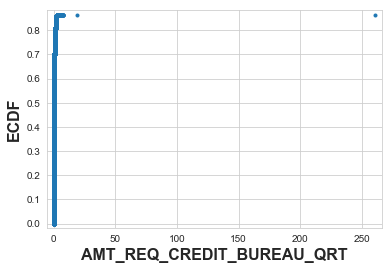

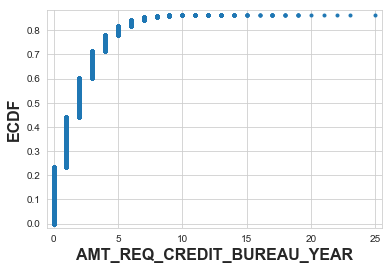

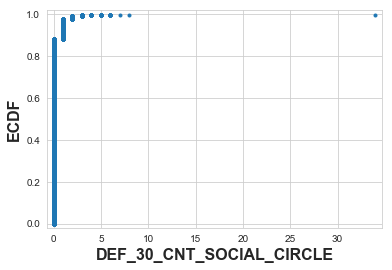

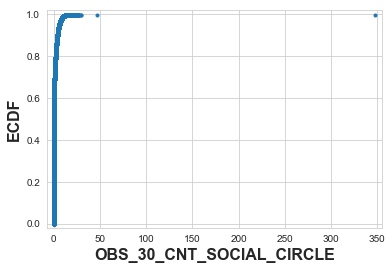

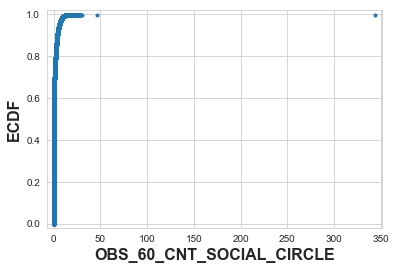

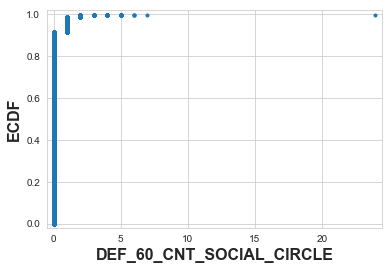

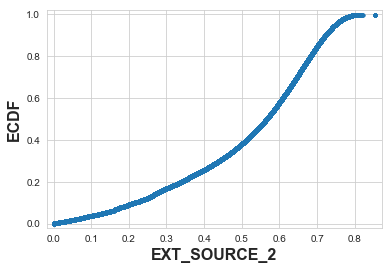

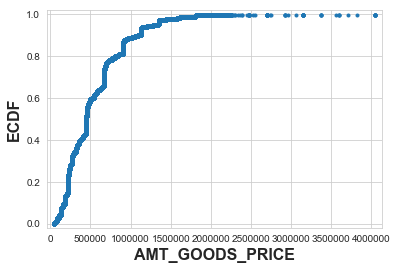

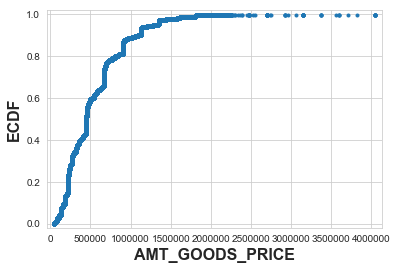

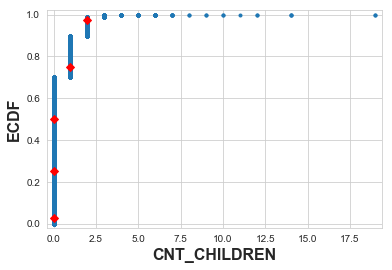

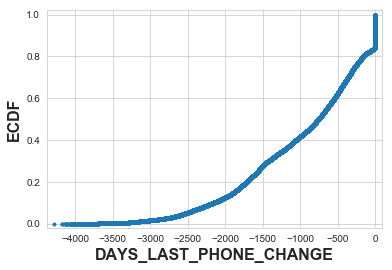

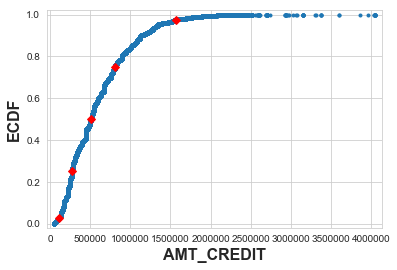

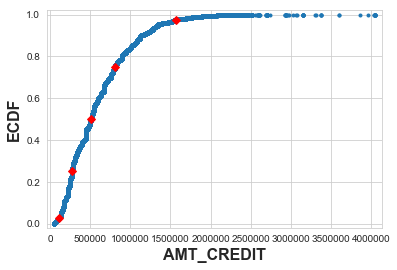

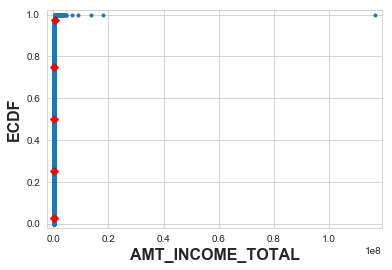

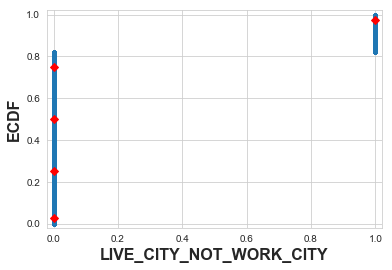

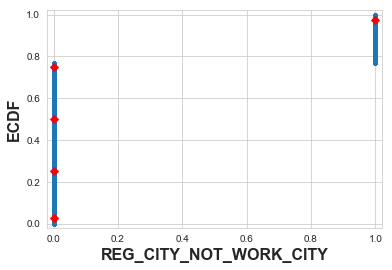

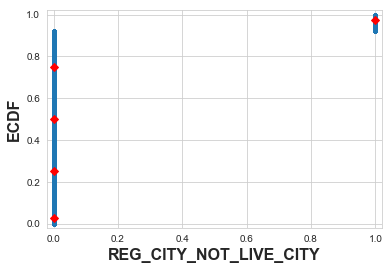

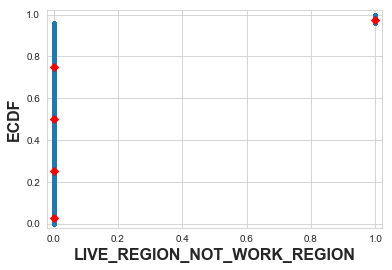

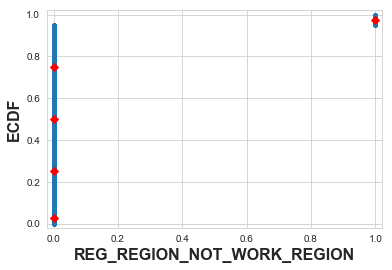

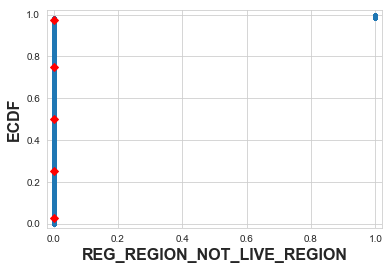

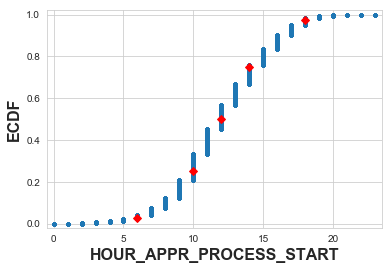

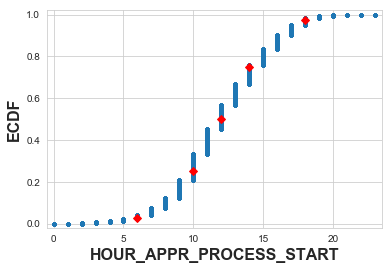

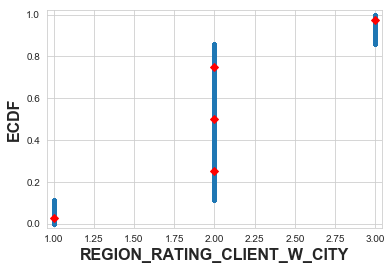

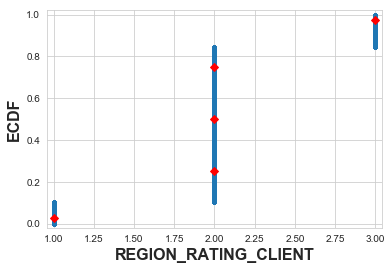

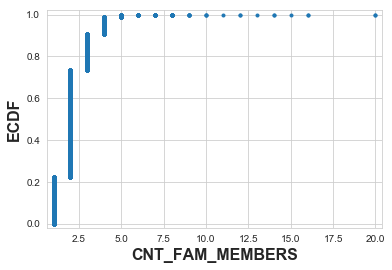

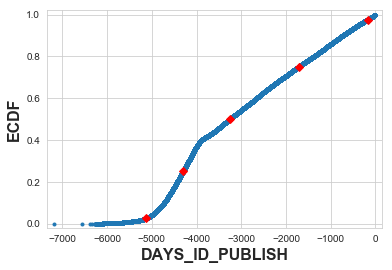

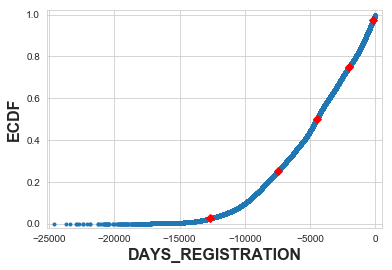

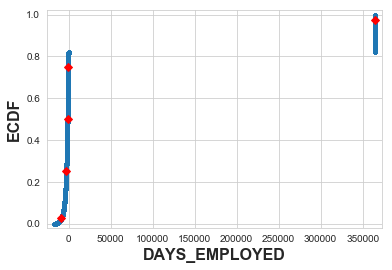

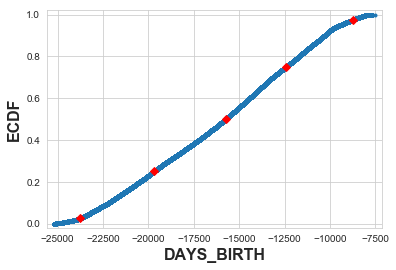

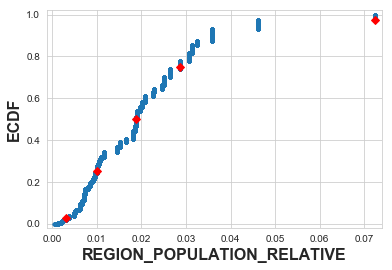

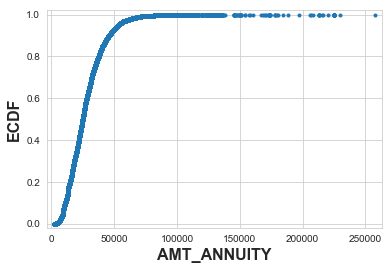

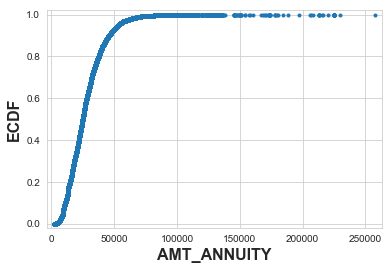

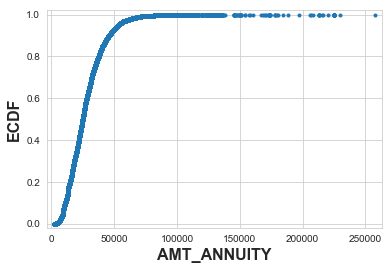

In [14]:
def ecdf(data): #Empirical Cumulative Distribution Function
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    plt.plot(x, y, marker='.', linestyle='none')
    plt.margins(0.02)
    plt.xlabel(data.name, fontweight='bold', fontsize=16)
    plt.ylabel('ECDF', fontweight='bold', fontsize=16)
    
    percentiles = np.array([2.5, 25, 50, 75, 97.5])
    ptiles = np.percentile(data, percentiles)
    plt.plot(ptiles, percentiles/100, marker='D', color='red', linestyle='none')
    
    return plt.show()

# Plot ECDF
fig = plt.figure(figsize=(24, 140), facecolor='white')
for r in range(len(continuous_cols)):
    ax = fig.add_subplot(21,4,r+1)
    ax.set_title(continuous_cols[r], fontweight='bold')
    ax = ecdf(data[continuous_cols[r]])    

### Correlations

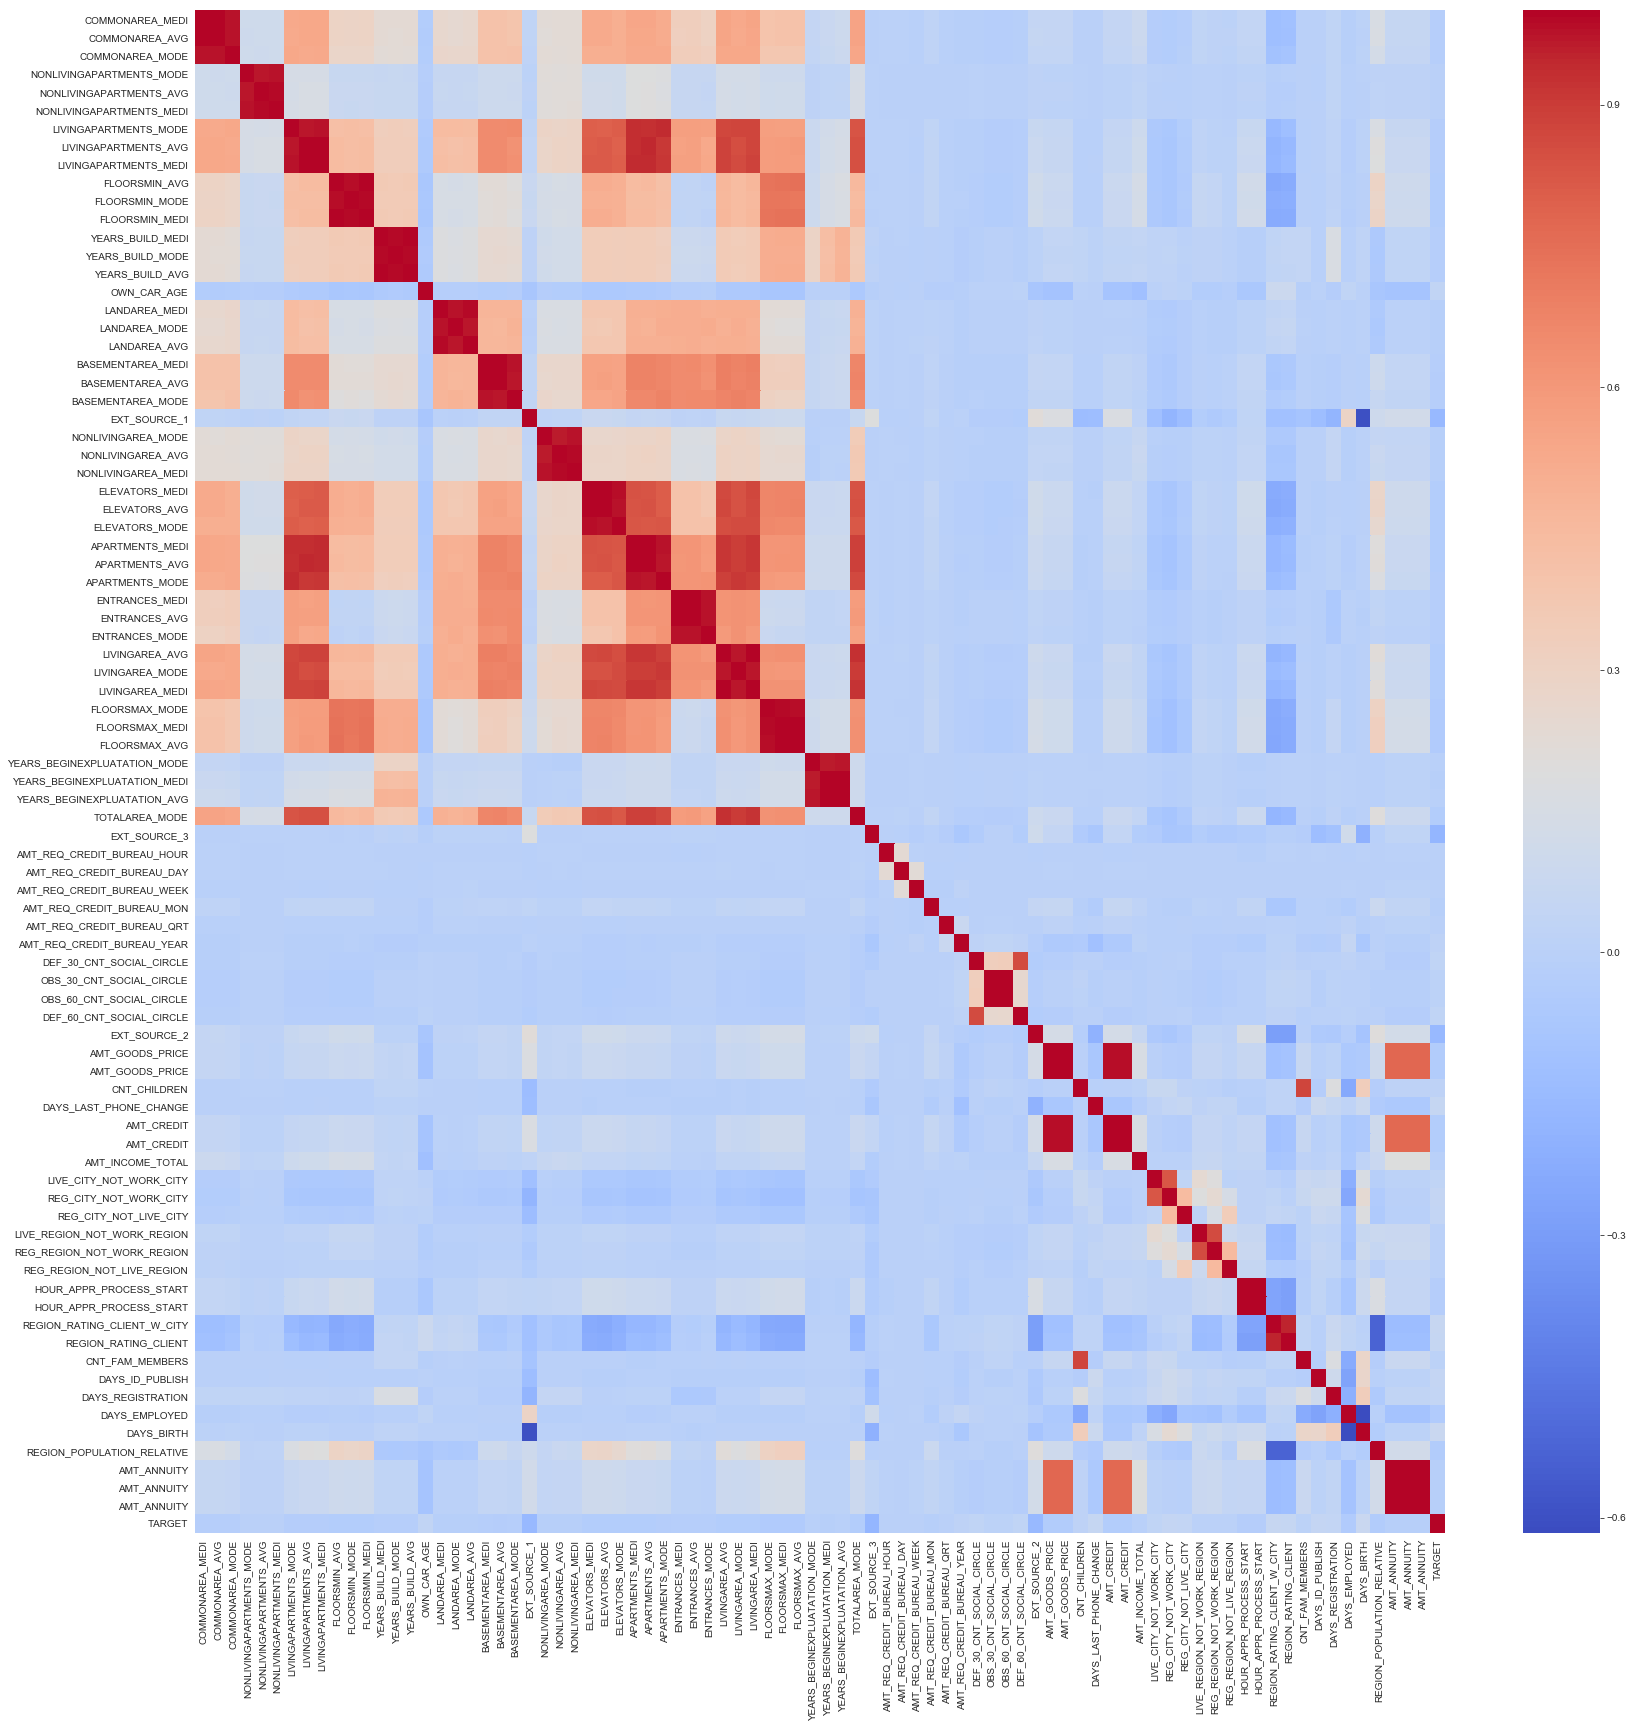

In [15]:
continuous_cols.append("TARGET")

plt.figure(figsize=(28,28))
sns.heatmap(data[continuous_cols].corr(), cmap="coolwarm", cbar=True);

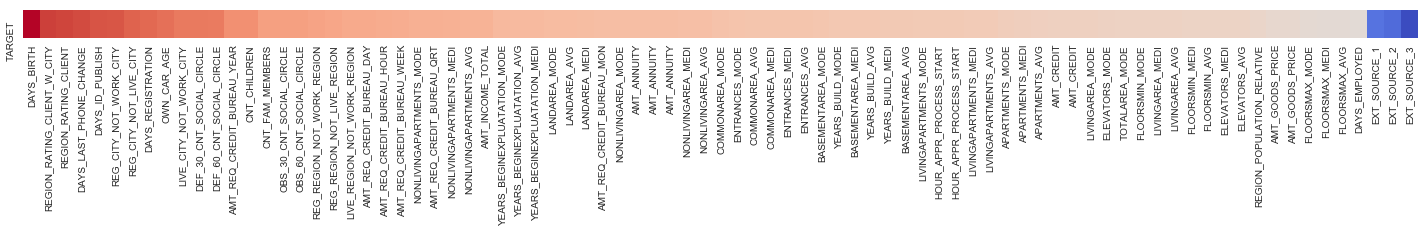

In [16]:
plt.figure(figsize=(25,0.5))
sns.heatmap(pd.DataFrame((data[continuous_cols].corr().loc["TARGET",:])
                         .sort_values(ascending=False)).iloc[1:,:].T,
            cmap="coolwarm", cbar=False);

In [17]:
pd.DataFrame((data[continuous_cols].corr().loc["TARGET",:])
                         .sort_values(ascending=False)).iloc[1:,:].T

DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
TARGET    0.078239                     0.060893              0.058899   

        DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
TARGET                0.055218         0.051457                0.050994   

        REG_CITY_NOT_LIVE_CITY  DAYS_REGISTRATION  OWN_CAR_AGE  \
TARGET                0.044395           0.041975     0.037612   

        LIVE_CITY_NOT_WORK_CITY  DEF_30_CNT_SOCIAL_CIRCLE  \
TARGET                 0.032518                  0.032248   

        DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
TARGET                  0.031276                     0.01993      0.019187   

        CNT_FAM_MEMBERS  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
TARGET         0.009308                  0.009131                  0.009022   

        REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION  \
TARGET                    0.006942                    0.005576   

        LIVE_REGION_NOT_WORK_REGION  AMT_REQ_CREDIT_BUREAU_DAY  \
TARGET                     0.002819                   0.002704   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                     0.00093                    0.000788   

        NONLIVINGAPARTMENTS_MODE  AMT_REQ_CREDIT_BUREAU_QRT  \
TARGET                 -0.001557                  -0.002022   

        NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG  AMT_INCOME_TOTAL  \
TARGET                 -0.002757                -0.003176         -0.003982   

        YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG  \
TARGET                     -0.009036                    -0.009728   

        YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MODE  LANDAREA_AVG  \
TARGET                     -0.009993      -0.010174     -0.010885   

        LANDAREA_MEDI  AMT_REQ_CREDIT_BUREAU_MON  NONLIVINGAREA_MODE  \
TARGET      -0.011256                  -0.012462           -0.012711   

        AMT_ANNUITY  AMT_ANNUITY  AMT_ANNUITY  NONLIVINGAREA_MEDI  \
TARGET    -0.012817    -0.012817    -0.012817           -0.013337   

        NONLIVINGAREA_AVG  COMMONAREA_MODE  ENTRANCES_MODE  COMMONAREA_AVG  \
TARGET          -0.013578         -0.01634       -0.017387        -0.01855   

        COMMONAREA_MEDI  ENTRANCES_MEDI  ENTRANCES_AVG  BASEMENTAREA_MODE  \
TARGET        -0.018573       -0.019025      -0.019172          -0.019952   

        YEARS_BUILD_MODE  BASEMENTAREA_MEDI  YEARS_BUILD_AVG  \
TARGET         -0.022068          -0.022081        -0.022149   

        YEARS_BUILD_MEDI  BASEMENTAREA_AVG  LIVINGAPARTMENTS_MODE  \
TARGET         -0.022326         -0.022746              -0.023393   

        HOUR_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
TARGET                -0.024166                -0.024166   

        LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  APARTMENTS_MODE  \
TARGET              -0.024621             -0.025031        -0.027284   

        APARTMENTS_MEDI  APARTMENTS_AVG  AMT_CREDIT  AMT_CREDIT  \
TARGET        -0.029184       -0.029498   -0.030369   -0.030369   

        LIVINGAREA_MODE  ELEVATORS_MODE  TOTALAREA_MODE  FLOORSMIN_MODE  \
TARGET        -0.030685       -0.032131       -0.032596       -0.032698   

        LIVINGAREA_MEDI  LIVINGAREA_AVG  FLOORSMIN_MEDI  FLOORSMIN_AVG  \
TARGET        -0.032739       -0.032997       -0.033394      -0.033614   

        ELEVATORS_MEDI  ELEVATORS_AVG  REGION_POPULATION_RELATIVE  \
TARGET       -0.033863      -0.034199                   -0.037227   

        AMT_GOODS_PRICE  AMT_GOODS_PRICE  FLOORSMAX_MODE  FLOORSMAX_MEDI  \
TARGET        -0.039645        -0.039645       -0.043226       -0.043768   

        FLOORSMAX_AVG  DAYS_EMPLOYED  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  
TARGET      -0.044003      -0.044932     -0.155317     -0.160472     -0.178919

In [18]:
pd.DataFrame((data[continuous_cols].corr().loc["TARGET",:])
                         .sort_values(ascending=False)).iloc[1:,:].describe().T

count      mean       std       min       25%      50%       75%  \
TARGET   83.0 -0.013585  0.040509 -0.178919 -0.030369 -0.01634  0.001817   

             max  
TARGET  0.078239

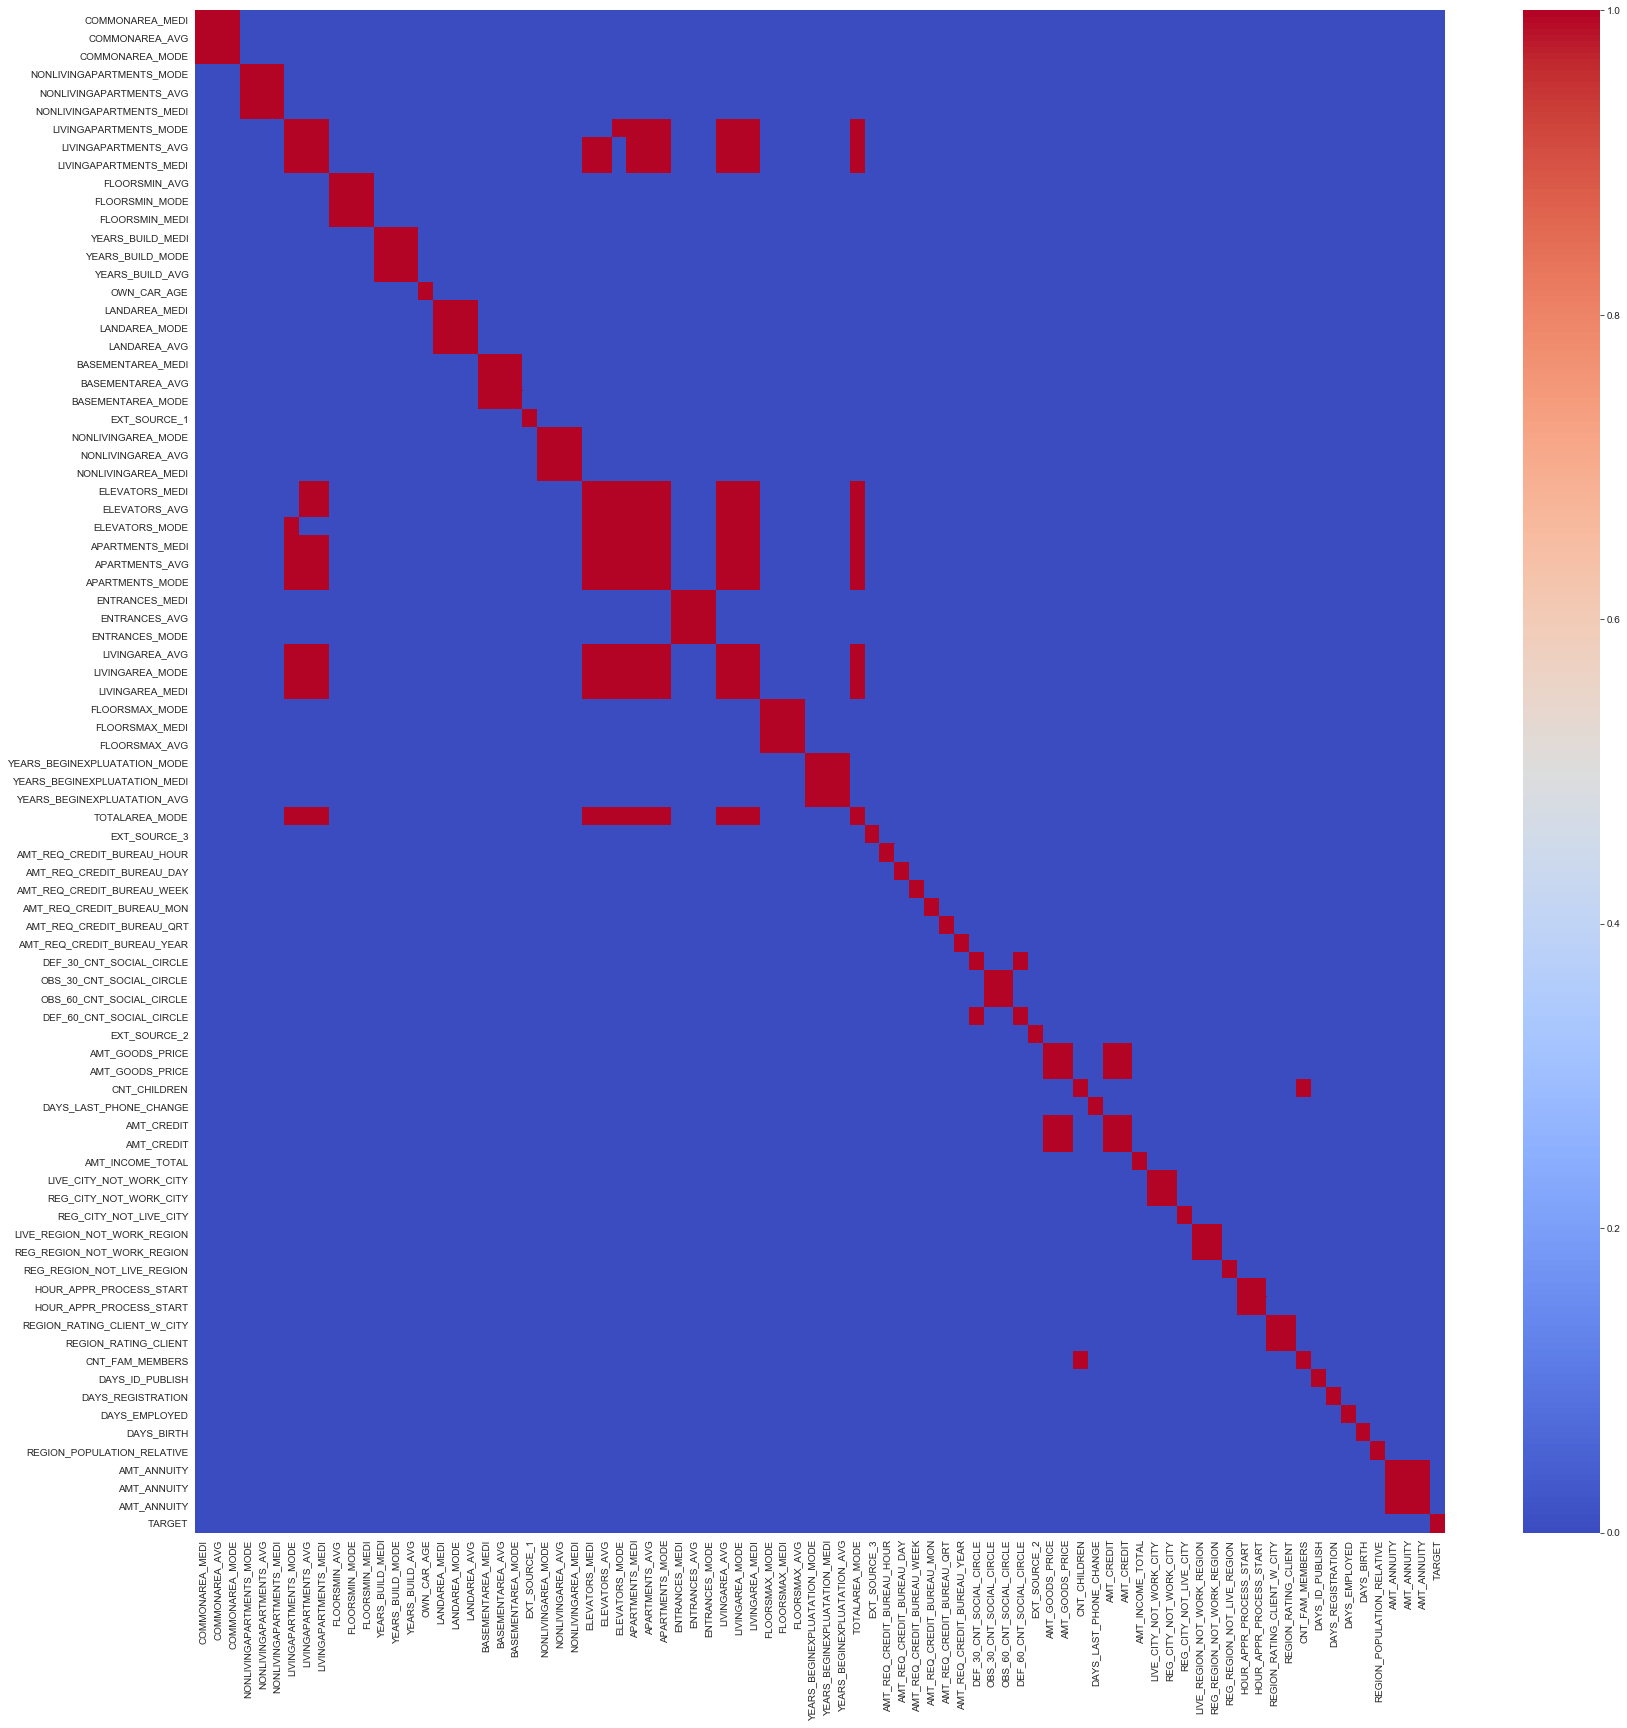

In [19]:
#data[continuous_cols].corr()>0.8
plt.figure(figsize=(28,28))
sns.heatmap(data[continuous_cols].corr()>0.8, cmap="coolwarm", cbar=True);

# Data Transformations
In order to treat the dataset so a supervised model can be applied to it, some data transformations will be performed as outlined below:

**Steps:**
- Get dummy variables for categorical columns
- Impute missing values with the median by column
- Sub-sample data to reduce computing time

Initially, a subsample of negative cases will address the fact that the data is heavily imbalanced. Moreover, this will also drastically reduce computation time, as the dimensions will be reduced. Finally, an imputer will be used to fill out missing values with a simple strategy of the most-frequent value.

### Sub-sampling negative cases
In order to be able to use polynomial features and still be able to work with the dataset, it will be sampled to become smaller in order to fit in memory.

In [20]:
print('Distribution of target variable:')
print(data.TARGET.value_counts(),'\n')

# 20% sample of negative_cases
negative_cases = data[data['TARGET'] == 0].sample(frac=0.2)
positive_cases = data[data['TARGET'] == 1]

data = pd.concat([positive_cases,negative_cases], axis=0)
print('\nNew distribution of target variable:\n',data.TARGET.value_counts())

Distribution of target variable:
0    282686
1     24825
Name: TARGET, dtype: int64 


New distribution of target variable:
 0    56537
1    24825
Name: TARGET, dtype: int64


In [21]:
data.TARGET.value_counts().sum() == data.shape[0]

True

The target variable has 0 missing values.
Positive cases represent 30.5% of all the samples.


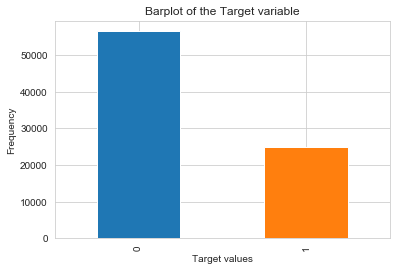

In [22]:
print("The target variable has {} missing values.".format(data["TARGET"].isnull().sum()))
print("Positive cases represent {:.3}% of all the samples.".format((data["TARGET"].sum()/data["TARGET"].shape[0])*100))
data["TARGET"].value_counts().plot(kind="bar", title="Barplot of the Target variable")

plt.xlabel("Target values"); plt.ylabel("Frequency");

### Imputer

In [23]:
from sklearn.preprocessing import Imputer

continuous_cols.remove('TARGET')

# Dummy variables
dummies = pd.get_dummies(data[categorical_cols + continuous_cols], drop_first=True)

X = dummies
y = data['TARGET']

# Imputer
imp = Imputer(strategy='most_frequent')
X_imp = imp.fit_transform(X)
print("Before subsample: ",X_imp.shape, y.shape)

Before subsample:  (81362, 246) (81362,)


### Missing data (before and after imputer)

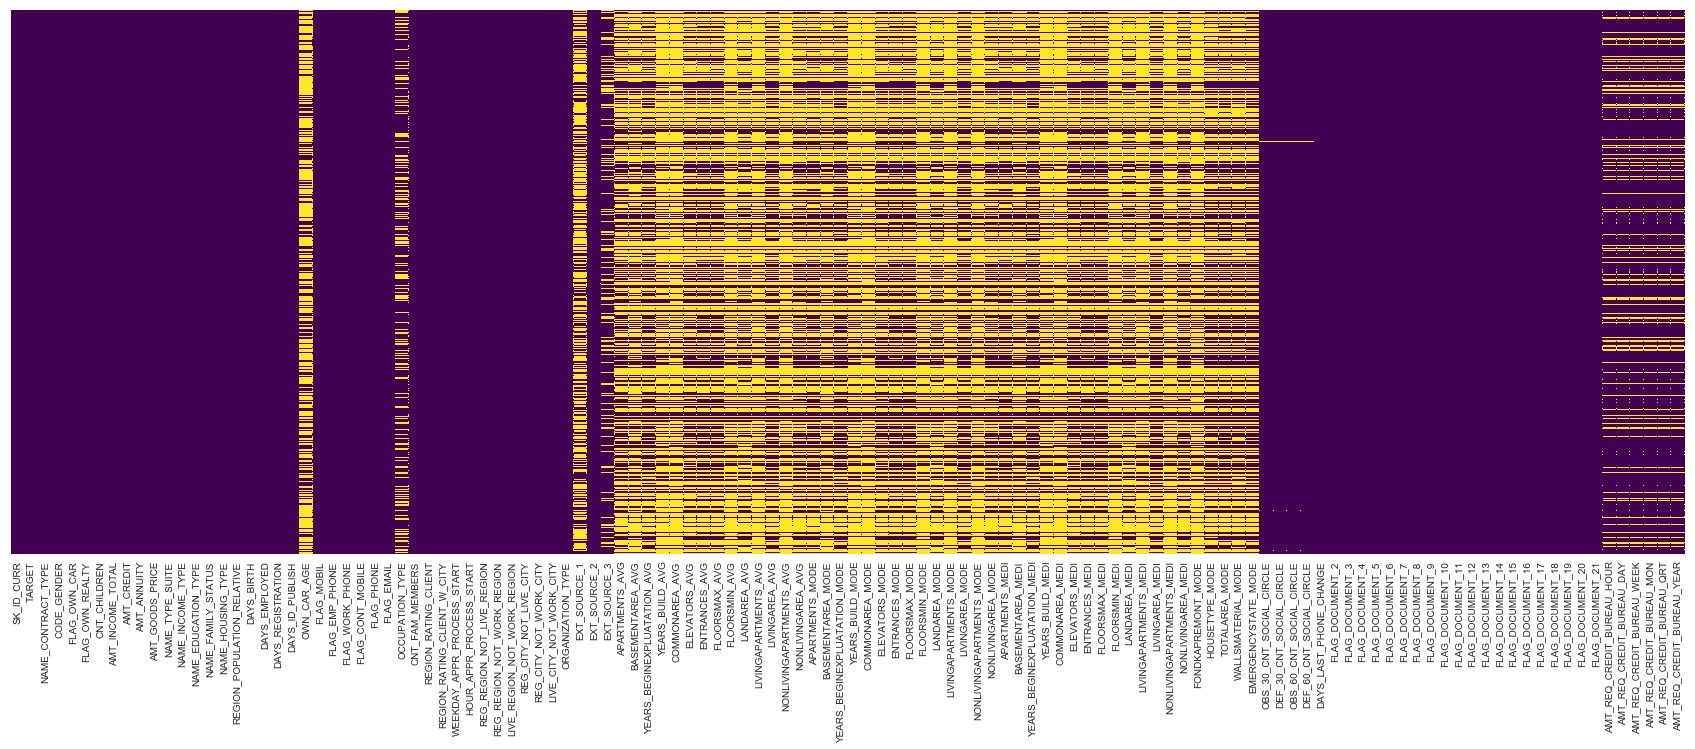

In [24]:
# Vizualization of missing values in the original dataset
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False);

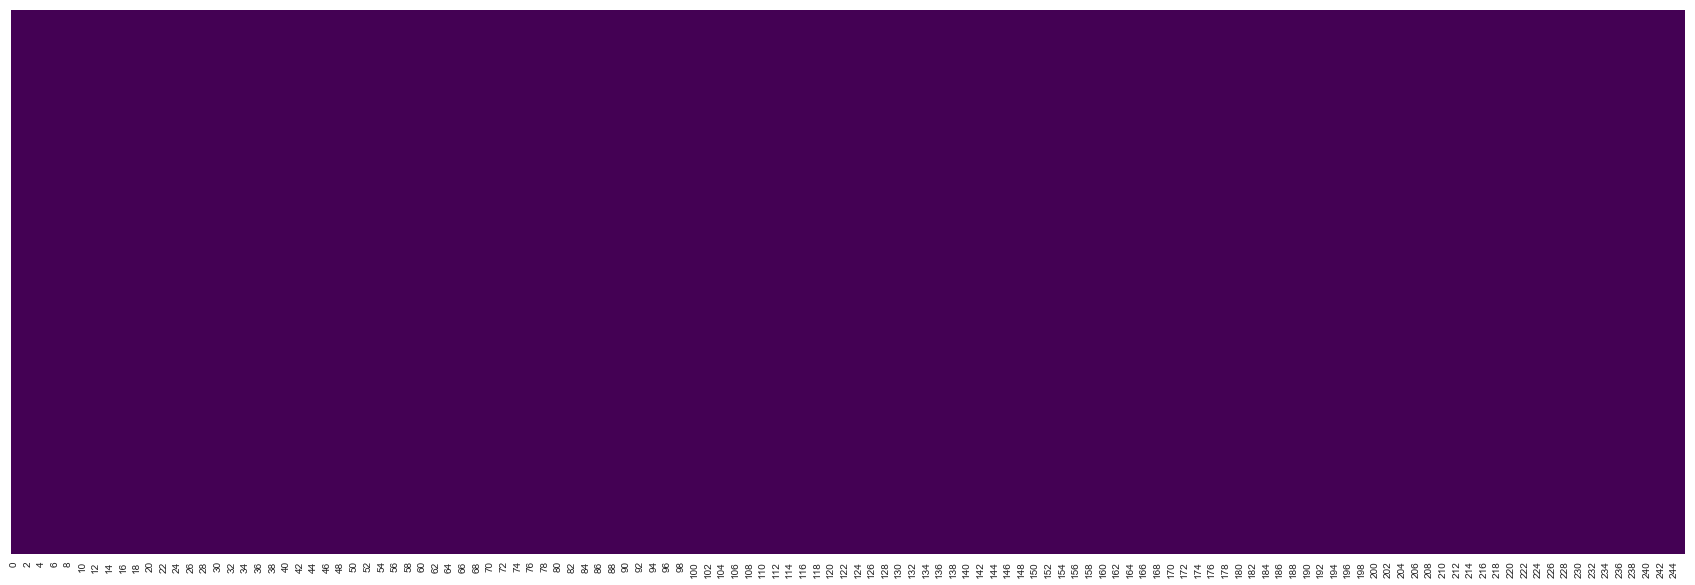

In [25]:
# Vizualization of missing values in the imputed dataset'
plt.figure(figsize=(30,10))
sns.heatmap(pd.DataFrame(X_imp).isnull(), cmap="viridis", cbar=False, yticklabels=False);

### Organizing final dataset

In [26]:
X_imputed = pd.DataFrame(X_imp, columns=X.columns).reset_index().drop('index', axis=1)
y_final = pd.DataFrame(y).reset_index().drop('index', axis=1)

data_final = pd.concat([X_imputed, y_final], axis=1)
data_final.head(2)

FLAG_CONT_MOBILE  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0               1.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   

   FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_2  \
0               0.0               0.0               0.0              0.0   
1               0.0               0.0               0.0              0.0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
0               0.0               0.0              1.0              0.0   
1               0.0               0.0              1.0              0.0   

   FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   FLAG_DOCUMENT_9  FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_PHONE  \
0              0.0         0.0             1.0         1.0         1.0   
1              0.0         0.0             1.0         1.0         0.0   

   FLAG_WORK_PHONE  COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE  \
0              0.0           0.0144          0.0143           0.0144   
1              0.0           0.0000          0.0000           0.0000   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_AVG  \
0                       0.0                      0.0   
1                       0.0                      0.0   

   NONLIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_AVG  \
0                       0.0                 0.0220                0.0202   
1                       0.0                 0.0735                0.0672   

   LIVINGAPARTMENTS_MEDI  FLOORSMIN_AVG  FLOORSMIN_MODE  FLOORSMIN_MEDI  \
0                 0.0205         0.1250          0.1250          0.1250   
1                 0.0684         0.2083          0.2083          0.2083   

   YEARS_BUILD_MEDI  YEARS_BUILD_MODE  YEARS_BUILD_AVG  OWN_CAR_AGE  \
0            0.6243            0.6341           0.6192          7.0   
1            0.8189            0.8236           0.8164          7.0   

   LANDAREA_MEDI  LANDAREA_MODE  LANDAREA_AVG  BASEMENTAREA_MEDI  \
0         0.0375         0.0377        0.0369             0.0369   
1         0.0270         0.0271        0.0265             0.0089   

   BASEMENTAREA_AVG  BASEMENTAREA_MODE  EXT_SOURCE_1  NONLIVINGAREA_MODE  \
0            0.0369             0.0383      0.083037                 0.0   
1            0.0089             0.0092      0.162605                 0.0   

   NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  \
0                0.0                 0.0             0.0            0.0   
1                0.0                 0.0             0.0            0.0   

   ELEVATORS_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  \
0             0.0           0.0250          0.0247           0.0252   
1             0.0           0.0167          0.0165           0.0168   

   ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  \
0           0.069          0.069           0.069          0.0190   
1           0.069          0.069           0.069          0.0094   

   LIVINGAREA_MODE  LIVINGAREA_MEDI  FLOORSMAX_MODE  FLOORSMAX_MEDI  \
0           0.0198           0.0193          0.0833          0.0833   
1           0.0083           0.0096          0.0417          0.0417   

   FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
0         0.0833                        0.9722                        0.9722   
1         0.0417                        0.9732                        0.9732   

   YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE  EXT_

In [29]:
print(data_final['TARGET'].value_counts().sum() == data_final.shape[0])
data_final.to_csv("data_sampled.csv", index=False)

True
